# Understanding Descriptive Statistics

Import the necessary libraries here:

In [68]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
def dice10(x):
    return (random.choices(x, k = 10))

In [3]:
dice10([1,2,3,4,5,6])

[3, 1, 3, 5, 1, 5, 6, 4, 4, 6]

In [4]:
dice_rolls = dice10([1,2,3,4,5,6])

#### 2.- Plot the results sorted by value.

In [5]:
df = pd.DataFrame(dice_rolls, columns = ["values"])

In [6]:
df

,values
0,3
1,2
2,1
3,5
4,6
5,5
6,4
7,1
8,5
9,5


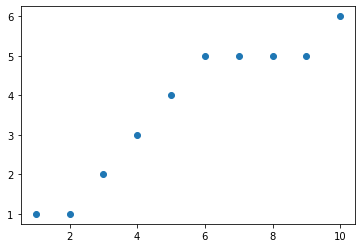

In [7]:
df = df.sort_values(by=["values"])

x=range(1,11)
plt.scatter(x, df)
plt.show()

In [8]:
df

,values
2,1
7,1
1,2
0,3
6,4
3,5
5,5
8,5
9,5
4,6


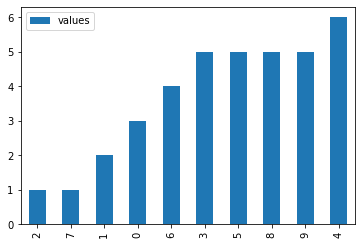

In [9]:
df.plot(kind = "bar")

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

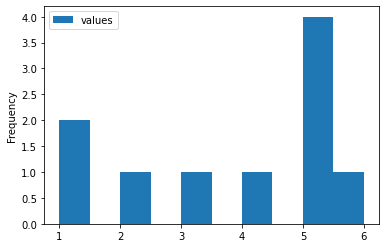

In [10]:
df.plot(kind = "hist")

In [11]:
"""
The first bar chart describes each index value and the second describes the number of appearance of each value in the df
"""

'\nThe first bar chart describes each index value and the second describes the number of appearance of each value in the df\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [12]:
def mean_value(x):
    return sum(x)/len(x)      

In [13]:
mean_value(df['values'])

3.7

In [14]:
#check the correct answer!

import statistics
statistics.mean(df['values'])

3.7

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [15]:
df1 = df['values'].value_counts()

In [16]:
df1

5    4
1    2
6    1
4    1
3    1
2    1
Name: values, dtype: int64

In [17]:
mean_value(df1)

1.6666666666666667

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [18]:
def median_value(x):
    n = len(x)
    indexmid = n//2
    if n % 2 == 0:
        return sum(sorted(x)[indexmid - 1 : indexmid + 1]) / 2
    else:
        return sorted(x)[indexmid]

In [19]:
median_value(df['values'])

4.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [20]:
#not mine, stole it but wanted to have it as a reference 


def quartiles(x):
    
    # Number of observations
    n = len(x)
    
    # Index of the middle element
    index = n // 2
    
    median = med(x)
    
    lower_Q = 0
    upper_Q = 0
    
    if n % 2 == 0:
        
        lower_Q = med(sorted(x)[:index])
        
        upper_Q = med(sorted(x)[index:])

    else:
        lower_Q = med(x[:index+1])
        
        upper_Q = med(x[index+1:])
        
    return lower_Q, median, upper_Q, max(x)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [23]:
df2 = pd.read_csv('/Users/Kakurebono/Documents/GitHub/Descriptive-Stats/data/roll_the_dice_hundred.csv',index_col=0)
df2.head(10)
df2.sort_values(by=['value'])

,roll,value
0,0,1
47,47,1
56,56,1
9,9,1
73,73,1
...,...,...
17,17,6
11,11,6
24,24,6
21,21,6


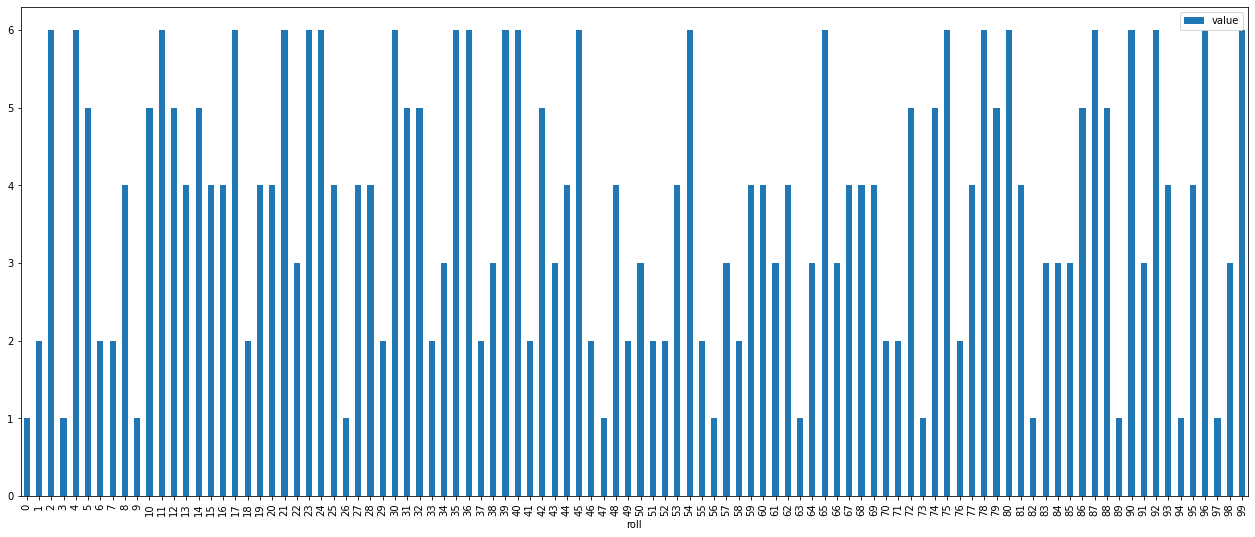

In [27]:
df2.set_index("roll").plot.bar(figsize=(22,9));

In [30]:
"""the distribution looks random, not normally ditributed. 
"""

#can you add further comments to this, please?
#What do ZOU see? What is the observation _should_ be concluded?

'the distribution looks random, not normally ditributed. \n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [31]:
mean_value(df2['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [32]:
df2_freq = df2['value'].value_counts()
df2_freq

6    23
4    22
2    17
3    14
5    12
1    12
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

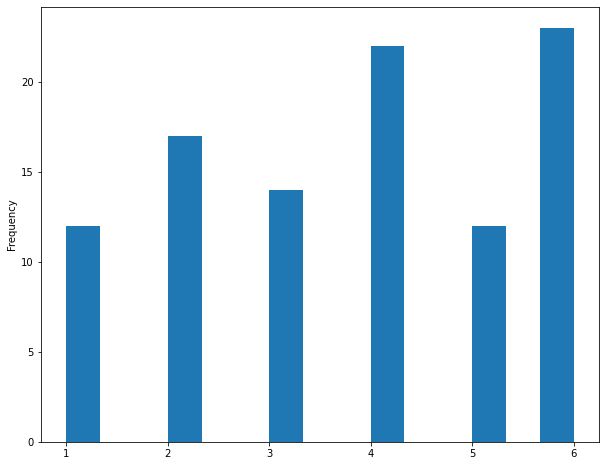

In [35]:
df2["value"].plot.hist(bins=15, figsize=(10, 8))

In [ ]:
"""
the distribution is not 
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [43]:
df3 = pd.read_csv('/Users/Kakurebono/Documents/GitHub/Descriptive-Stats/data/roll_the_dice_thousand.csv', index_col=0)

df3.head()

,roll,value
0,0,5
1,1,6
2,2,1
3,3,6
4,4,5


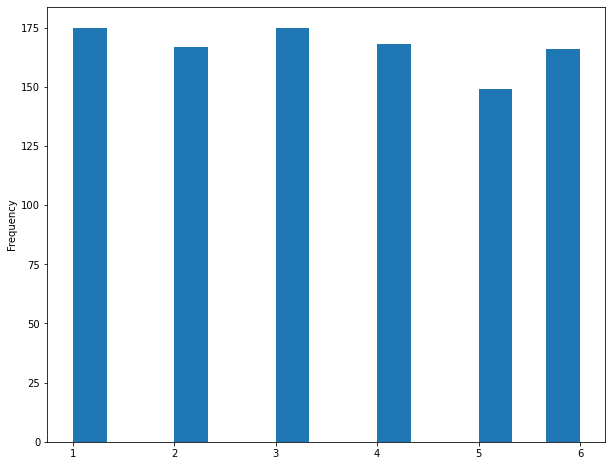

In [44]:
df3["value"].plot.hist(bins=15, figsize=(10, 8))

In [ ]:
"""
the higher the amount of rolls the more evenly distributed the dataset gets. 
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

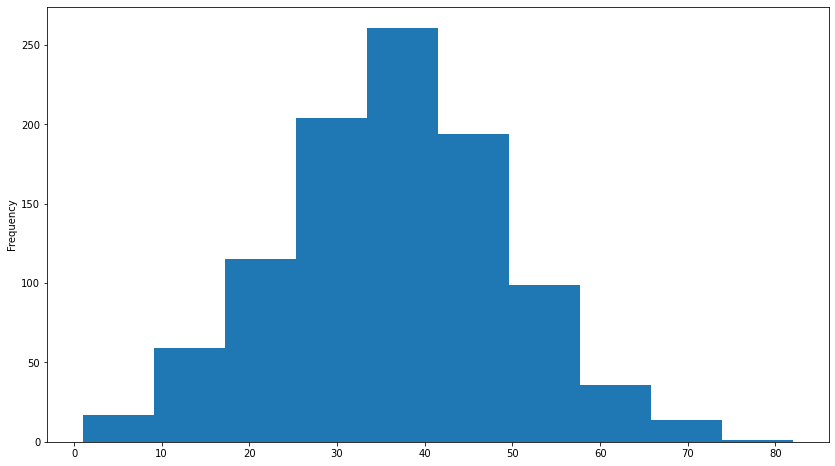

In [52]:
df4 = pd.read_csv('/Users/Kakurebono/Documents/GitHub/Descriptive-Stats/data/ages_population.csv')
df4['observation'].plot(kind = 'hist', figsize = (14,8))

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [54]:
df4.describe()

,observation
count,1000.0000
mean,36.5600
std,12.8165
min,1.0000
25%,28.0000
50%,37.0000
75%,45.0000
max,82.0000


In [ ]:
"""
your comments here
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

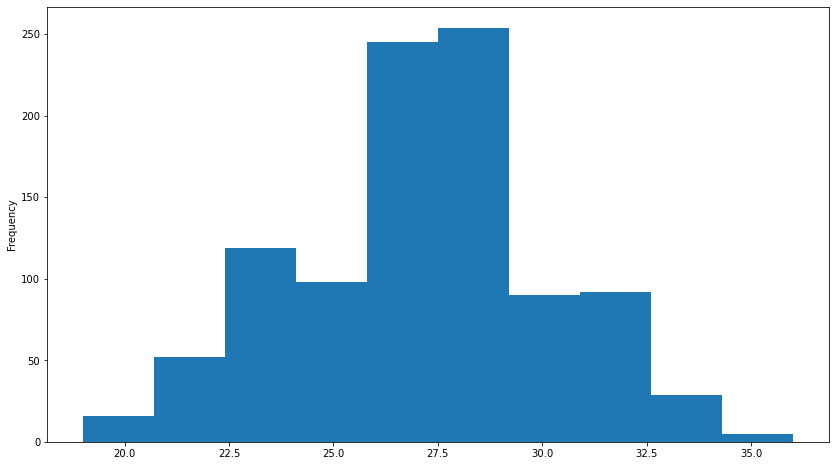

In [55]:
df5 = pd.read_csv('/Users/Kakurebono/Documents/GitHub/Descriptive-Stats/data/ages_population2.csv')
df5['observation'].plot(kind = 'hist', figsize = (14,8))

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [59]:
"""
your comments here
"""

'\nyour comments here\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [60]:
df5.describe()

,observation
count,1000.000000
mean,27.155000
std,2.969814
min,19.000000
25%,25.000000
50%,27.000000
75%,29.000000
max,36.000000


In [ ]:
"""
your comments here
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

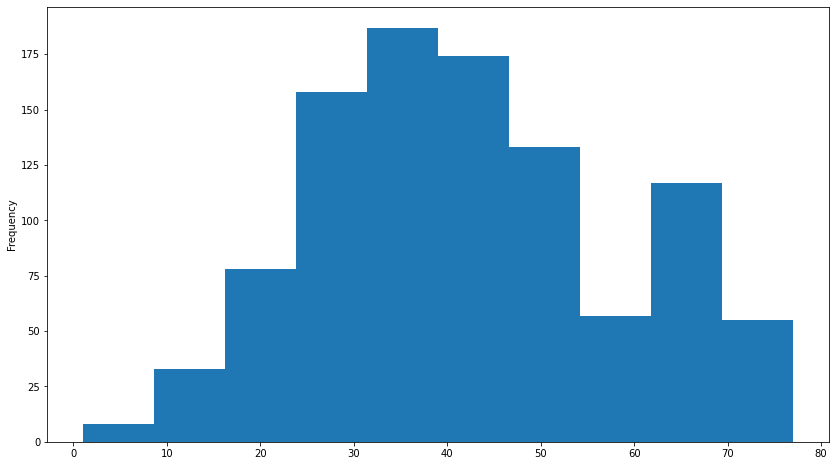

In [62]:
df6 = pd.read_csv('/Users/Kakurebono/Documents/GitHub/Descriptive-Stats/data/ages_population3.csv')
df6['observation'].plot(kind = 'hist', figsize = (14,8))

AttributeError: module 'seaborn' has no attribute 'histplot'

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [63]:
df6.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [ ]:
"""
your comments here
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [64]:
df6.describe().iloc[4:]

,observation
25%,30.0
50%,40.0
75%,53.0
max,77.0


In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""